# Advanced Practice
There are two main kinds of API:

*   SOAP (Simple Object Access
Protocol) for enterprise, strict regulations
*   REST (Representational State Transfer) for public API, good for getting data from the web.

We are going to learn REST API for:

1.  Calling API through Python;

*   1.1 Random User API: https://api-ninjas.com/api/randomuser
*   1.2 Endpoints and resources
*   HTTP response status codes: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status
*   Query parameters

2.   Authentication

*   API Keys

3. Practice

*   Google Books
*   Free Weather ApI







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Calling API through Python


When using the API with Python, we need a package: requests

In colab, you can install this package by typing:

In [ ]:
!pip install requests

##### 1.1 Random User Generator API

This API is used to generate the random user data, such as name, email, address, username...

In [3]:
import requests
# get our response object
requests.get("https://randomuser.me/api/")

<Response [200]>

**“<Response [200]>”** indicates the request is successful.

The actual data content could be obtained by the 'text' part in response object.

In [4]:
data = requests.get("https://randomuser.me/api/")
#data.json()
#print(data.text)

##### 1.2 Endpoints and resources

**Endpoints:** An API endpoint is typically a uniform resource locator (URL) that provides the location of a resource on the server.

Here we will take our second API as an example: The DogAPI.
https://www.thedogapi.com/

In [5]:
response = requests.get("https://api.thedogapi.com/")
print(response.text)

{"service":"TheDogAPI","version":"1.6.1","env":"production","openapi":"/openapi-json","docs":"https://docs.TheDogAPI.com"}


The Dog API is a base URL,we can only receive the basic information about the API, not real data.

If we want to find more information based on this basic URL, we need to use the **Endpoints**.

In [6]:
import requests
response = requests.get("https://api.thedogapi.com/v1/breeds/")
print(response.status_code)
print(response.text)

403
{"timestamp":"2026-01-29T23:00:18.831Z","path":"/v1/breeds/","message":"Authentication required. Please provide a valid API key.","error":"Forbidden","statusCode":403}


In [8]:
#get the properties of the request object in the HTTP response object
re = response.request
print(re.url)
print(re.method)
print(re.headers)

https://api.thedogapi.com/v1/breeds/
GET
{'User-Agent': 'python-requests/2.32.4', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}


##### 1.3 HTTP response status codes and Header
There are four mains HTTP response codes:

* Informational responses (100 ~ 199)
* Successful responses (200 ~ 299)
* Redirection messages (300 ~ 399)
* Client error responses (400 ~ 499)
* Server error responses (500 ~ 599)

In [11]:
# 404 Not Found
requests.get("https://api.thedogapi.com/v1/breedt")

<Response [404]>

HTTP headers will define the parameters governing requests and responses:

Content-Type;User-Agent(software from the client);Server

In [12]:
response = requests.get("https://api.thedogapi.com/v1/breeds/")
response.headers
#returned by the server containing meta information about the server response

{'Date': 'Thu, 29 Jan 2026 16:12:23 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'etag': 'W/"a7-7FYG3T+JACNMRcEkO/PYLtITN7w"', 'x-cloud-trace-context': 'da22b7771b518fd3b577022778c1547e', 'Server': 'cloudflare', 'cf-cache-status': 'DYNAMIC', 'Nel': '{"report_to":"cf-nel","success_fraction":0.0,"max_age":604800}', 'Report-To': '{"group":"cf-nel","max_age":604800,"endpoints":[{"url":"https://a.nel.cloudflare.com/report/v4?s=dH%2BpdsvW8ocvHi73gV17fgRA9pfYFObmb53TQPDbQT5ayAQUeKPlOzmvmvOwj73J1uSoJbnwkK1aaHo9GPv1LuppjqSubO4I%2BLedpcBpmg%3D%3D"}]}', 'Content-Encoding': 'zstd', 'CF-RAY': '9c5a02c709796de2-SEA', 'alt-svc': 'h3=":443"; ma=86400'}

In [13]:
response.request.headers
#contain information about our request

{'User-Agent': 'python-requests/2.32.4', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}

##### 1.4 Query parameters
Query parameters is used to extract **certain information** based on the given URL+Endpoints.


YouTube video link:

https://www.youtube.com/watch?v=_IOs0dh_kzk

Here, ***v*** is the query parameter. It usually comes after the base URL and the endpoint.

**"_IOs0dh_kzk"** is the unique identifier for this the video.

(1) Add a question mark (?) before the first query parameter.

(2) Use the ampersand (&) to separate multiple query parameters.

In [13]:
# json function
requests.get("https://randomuser.me/api/?gender=female").json()

{'results': [{'gender': 'female',
   'name': {'title': 'Mrs', 'first': 'Isabella', 'last': 'Bergeron'},
   'location': {'street': {'number': 5165, 'name': 'Pine Rd'},
    'city': 'Deer Lake',
    'state': 'Northwest Territories',
    'country': 'Canada',
    'postcode': 'I4Z 7O3',
    'coordinates': {'latitude': '-65.7597', 'longitude': '12.0761'},
    'timezone': {'offset': '+5:30',
     'description': 'Bombay, Calcutta, Madras, New Delhi'}},
   'email': 'isabella.bergeron@example.com',
   'login': {'uuid': '16b8c36a-6c65-4a7b-aa5e-896e1bc6165a',
    'username': 'greentiger562',
    'password': 'papa',
    'salt': 'AWxtNER3',
    'md5': '537c803d960ee50a637baf52df6f95d0',
    'sha1': 'fef1b32a1854d672f27671cb93773551cfe26005',
    'sha256': '442538014e22ab0a126727b33ae6ef87c4316c6c1fcb9710285180ac704fb52d'},
   'dob': {'date': '1977-09-02T17:07:46.090Z', 'age': 48},
   'registered': {'date': '2009-12-08T11:55:12.011Z', 'age': 16},
   'phone': 'B77 K03-3634',
   'cell': 'J72 W40-3384',

# Authentication
To access more APIs which need authentication

**403 Forbidden**

The unauthorized client does not have access rights to the content, so the server is refusing to give the requested resource.

##### API Keys

In [18]:
from google.colab import userdata
import requests
# v1/rovers/curiosity/photos is our endpoints
URL_endpoint = "https://api.nasa.gov/planetary/apod?api_key&date"
api_key = userdata.get("NASA_API_KEY")
query_params = {"api_key": api_key, "date": "2023-12-31"}
response = requests.get(URL_endpoint, params=query_params)
response.json()
photo = response.json()["hdurl"] # high-resolution 2048
photo

'https://apod.nasa.gov/apod/image/2601/NGC-2442-rev-1-crop-18-Jan-2026_2048.jpg'

In [ ]:
from IPython.display import Image, display

display(Image(url=photo))


In [16]:
img_req = requests.get(photo)
with open("example_nasa.jpg", "wb") as img:
    img.write(img_req.content)


# Practice


##### 3.1 Google Books

https://developers.google.com/books/docs/v1/reference/volumes/list

Based on this introduction link, find the books contain the words "morning" and output in a ".csv" file

In [22]:
import requests
import pandas as pd

URL_endpoint = "https://www.googleapis.com/books/v1/volumes"
query = "morning"
# Null DataFrame
df = pd.DataFrame(columns=["Title", "Published Date", "Description"])

params = {"q": query, "maxResults": 3}
response = requests.get(URL_endpoint, params=params).json()
response

{'kind': 'books#volumes',
 'totalItems': 1000000,
 'items': [{'kind': 'books#volume',
   'id': 'wGhDEQAAQBAJ',
   'etag': 'A4ucF1ZnjnI',
   'selfLink': 'https://www.googleapis.com/books/v1/volumes/wGhDEQAAQBAJ',
   'volumeInfo': {'title': 'Boys, Just Boys',
    'subtitle': 'Biography of a WWII Infantry Regiment',
    'authors': ['Brian Welke'],
    'publisher': 'Christian Faith Publishing, Inc.',
    'publishedDate': '2025-01-30',
    'description': "Through the voices of the men who experienced it, Boys, Just Boys relates the story of the 423rd regiment of the 106th Infantry Division during and after the Battle of the Bulge. In mid-December 1944, after rigorous training but no combat experience, the men of the 423rd, along with the rest of the division, arrived in the snows and forested ravines of the Ardennes/Schnee Eifel, the mountains straddling the border between Germany and eastern Belgium. As they dug into their positions, they were assured the Germans no longer posed much threa

In [27]:

for book in response.get("items", []):
    volume = book.get("volumeInfo", {})
    title = volume.get("title", "")
    published = volume.get("publishedDate", "")
    description = volume.get("description", "")  # not every book has description

    df = pd.concat(
        [df, pd.DataFrame({
            "Title": [title],
            "Published Date": [published],
            "Description": [description]
        })],
        ignore_index=True
    )

df.to_csv("books_info.csv", index=False)


# NLP practice

In [28]:
""" read text """
with open('shakespeare.txt', 'r', encoding='utf-8') as shakespeare_read:
    # read(n) method will put n characters into a string
    shakespeare_string = shakespeare_read.read()
shakespeare_string

"                     1\n  From fairest creatures we desire increase,That thereby beauty's rose might never die,But as the riper should by time decease,His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee.\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:  \n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n  To say within thine o

In [29]:
#shakespeare_split = shakespeare_string.split('\n') # each sentence or paragraph is split on a newline
shakespeare_split = shakespeare_string.split('.') #full stop
shakespeare_split

["                     1\n  From fairest creatures we desire increase,That thereby beauty's rose might never die,But as the riper should by time decease,His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee",
 "\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:  \n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n  To say within th

In [30]:
""" remove stop words """

STOPWORDS = ["an", "a", "the", "or", "and", "thou", "must", "that", "this", "self", "unless", "behind", "for", "which",
             "whose", "can", "else", "some", "will", "so", "from", "to", "by", "within", "of", "upon", "th", "with",
             "it"]

def _remove_stopwords(txt):
    """Delete from txt all words contained in STOPWORDS."""
    words = txt.split()
    # words = txt.split(" ")
    for i, word in enumerate(words):
        if word in STOPWORDS:
            words[i] = " "
    return (" ".join(words))

In [31]:
""" create a list of sentences """
import re
from collections import Counter

doc_out = []
for k in shakespeare_split:
    cleantextprep = str(k)
        # Regex cleaning #$#R#RT
    expression = "[^a-zA-Z ]"  # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep)  # apply regex
    cleantext = cleantextCAP.lower()  # lower case
    cleantext = _remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    doc_out.append(bound)       # a list of sentences
doc_out

['  fairest creatures we desire increasethat thereby beautys rose might never diebut as   riper should   time deceasehis tender heir might bear his memory but   contracted   thine own bright eyes feedst thy lights flame   selfsubstantial fuel making   famine where abundance lies thy   thy foe   thy sweet   too cruel     art now   worlds fresh ornament   only herald     gaudy spring   thine own bud buriest thy content   tender churl makst waste in niggarding pity   world       glutton be   eat   worlds due     grave   thee',
 'when forty winters shall besiege thy brow   dig deep trenches in thy beautys field thy youths proud livery   gazed on now   be   tattered weed   small worth held then being asked where all thy beauty lies where all   treasure   thy lusty days   say   thine own deep sunken eyes were   alleating shame   thriftless praise',
 'how much more praise deserved thy beautys use if   couldst answer   fair child   mine shall sum my count   make my old excuse proving his beaut

In [32]:
# the same as
import re

def process_text(texts):
    """
    Process a list of texts by cleaning, removing stopwords, and converting to lowercase.

    Args:
    texts (list): A list of text strings.

    Returns:
    list: A list of processed text strings.
    """
    processed_texts = []

    for text in texts:
        cleantextprep = str(text)
        # Regex cleaning
        # [^...] means any character except those specified within brackets
        expression = "[^a-zA-Z ]"
        cleantextCAP = re.sub(expression, '', cleantextprep)
        cleantext = cleantextCAP.lower()
        cleantext = _remove_stopwords(cleantext)
        bound = ''.join(cleantext)
        processed_texts.append(bound)

    return processed_texts
process_text(shakespeare_split)

['  fairest creatures we desire increasethat thereby beautys rose might never diebut as   riper should   time deceasehis tender heir might bear his memory but   contracted   thine own bright eyes feedst thy lights flame   selfsubstantial fuel making   famine where abundance lies thy   thy foe   thy sweet   too cruel     art now   worlds fresh ornament   only herald     gaudy spring   thine own bud buriest thy content   tender churl makst waste in niggarding pity   world       glutton be   eat   worlds due     grave   thee',
 'when forty winters shall besiege thy brow   dig deep trenches in thy beautys field thy youths proud livery   gazed on now   be   tattered weed   small worth held then being asked where all thy beauty lies where all   treasure   thy lusty days   say   thine own deep sunken eyes were   alleating shame   thriftless praise',
 'how much more praise deserved thy beautys use if   couldst answer   fair child   mine shall sum my count   make my old excuse proving his beaut

In [33]:
!pip install nltk

In [38]:
doc_out=process_text(shakespeare_split)
""" decompose a list of sentences into tokens(words) """
import nltk
nltk.download('punkt_tab')
# punkt data set contains training data for models for word segmentation and punctuation marks.

def decompose_word(doc):
    txt = []
    for word in doc:
        txt.extend(word.split())
    return txt

# decompose a list of sentences into words by self-defined function
tokens = decompose_word(doc_out)
# decompose a list of sentences into words from NLTK module
tokens_nltk = nltk.word_tokenize(str(doc_out))
print(tokens)
print(tokens_nltk)
#tokens_nltk

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['fairest', 'creatures', 'we', 'desire', 'increasethat', 'thereby', 'beautys', 'rose', 'might', 'never', 'diebut', 'as', 'riper', 'should', 'time', 'deceasehis', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'but', 'contracted', 'thine', 'own', 'bright', 'eyes', 'feedst', 'thy', 'lights', 'flame', 'selfsubstantial', 'fuel', 'making', 'famine', 'where', 'abundance', 'lies', 'thy', 'thy', 'foe', 'thy', 'sweet', 'too', 'cruel', 'art', 'now', 'worlds', 'fresh', 'ornament', 'only', 'herald', 'gaudy', 'spring', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', 'tender', 'churl', 'makst', 'waste', 'in', 'niggarding', 'pity', 'world', 'glutton', 'be', 'eat', 'worlds', 'due', 'grave', 'thee', 'when', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow', 'dig', 'deep', 'trenches', 'in', 'thy', 'beautys', 'field', 'thy', 'youths', 'proud', 'livery', 'gazed', 'on', 'now', 'be', 'tattered', 'weed', 'small', 'worth', 'held', 'then', 'being', 'asked', 'where', 'all', 'thy', 'beauty', 'lies',

##### 4.1 NLTK Stopwords

In [40]:
""" removing stopwords """
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')


example_sent = "This is a sample sentence, showing off the stop words filtration."
# stop words in English
stop_words = set(stopwords.words('english'))
# stop words in German
stop_words_German = set(stopwords.words('german'))
# stop words in Italian
stop_words_italian = set(stopwords.words('italian'))

word_tokens = word_tokenize(example_sent)
# compact syntax
filtered_sentence = [w for w in word_tokens if w not in stop_words]
# standard syntax
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### 4.2 NLTK Lemmatization

In [42]:
""" removing stopwords """
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
# rocks : rock
print("corpora :", lemmatizer.lemmatize("corpora"))
# corpora : corpus
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))
#better : good


[nltk_data] Downloading package wordnet to /root/nltk_data...


rocks : rock
corpora : corpus
better : good


##### 4.3 Sentiment / Textual analysis

In [44]:
""" Import lexicon for scrutify """
# Negative lexicon
ndct = ''
with open('bl_negative.csv', 'r', encoding='utf-8', errors='ignore') as infile:
    for line in infile:
        ndct = ndct + line
# create a list of negative words
ndct = ndct.split('\n')
print(ndct)
len(ndct)    # 4783 negative words

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

4783

In [45]:
# Positive lexicon
pdct = ''
with open('bl_positive.csv', 'r', encoding='utf-8', errors='ignore') as infile:
    for line in infile:
        pdct = pdct + line

pdct = pdct.split('\n')
print(pdct)
len(pdct)  # 2009 positive words

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

2009

In [46]:
from collections import Counter

def wordcount(text, lexicon):
    """Count the frequency of words from a given lexicon in the text."""
    # count the words that appear in the vocabulary and their frequency in the text
    word_freq = Counter(word for word in text if word in lexicon)
    # convert the results to a list and sort them by word
    return sorted(word_freq.items())


In [47]:
""" screen tokens that are in the selected lexicon """

# list of negative words and their frequency
nwc = wordcount(tokens, ndct)   # wordcount(text,lexicon)
# [['die', 3], ['famine', 1], ['lies', 2], ['foe', 1], ['cruel', 1], ['gaudy', 1], ['waste', 2], ['pity', 1], ['besiege', 1], ['tattered', 1], ['weed', 1], ['sunken', 1], ['shame', 3], ['excuse', 1], ['cold', 1], ['beguile', 1], ['wrinkles', 1], ['dies', 1], ['abuse', 1], ['deceive', 1], ['hideous', 1], ['sap', 1], ['frost', 1], ['prisoner', 1], ['bereft', 1], ['ragged', 1], ['forbidden', 1], ['death', 1], ['burning', 1], ['weary', 1], ['feeble', 1], ['sadly', 1], ['annoy', 1], ['offend', 1], ['chide', 1], ['wilt', 2], ['fear', 1], ['wail', 1], ['weep', 1], ['deny', 1], ['hate', 2], ['conspire', 1]]

# list of positive words and their frequency
pwc = wordcount(tokens, pdct)
# [['tender', 2], ['bright', 1], ['abundance', 1], ['sweet', 5], ['fresh', 2], ['spring', 1], ['proud', 1], ['worth', 1], ['beauty', 7], ['treasure', 3], ['praise', 2], ['fair', 3], ['proving', 1], ['warm', 1], ['fond', 1], ['lovely', 2], ['golden', 2], ['loveliness', 1], ['free', 1], ['beauteous', 2], ['great', 1], ['gentle', 2], ['work', 1], ['fairly', 1], ['excel', 1], ['leads', 1], ['willing', 1], ['happier', 2], ['gracious', 2], ['homage', 1], ['majesty', 1], ['heavenly', 1], ['strong', 1], ['adore', 1], ['like', 2], ['joy', 2], ['gladly', 1], ['pleasure', 1], ['sweetly', 1], ['happy', 1], ['pleasing', 1], ['well', 1], ['enjoys', 1], ['love', 4], ['beloved', 1]]

# Total number of positive/negative words
ntot, ptot = 0, 0
for i in range(len(nwc)):
    ntot += nwc[i][1]
for i in range(len(pwc)):
    ptot += pwc[i][1]
nwords = ntot+ptot

In [48]:
""" Print results """

print('Positive words:')
for i in range(len(pwc)):
    print(str(pwc[i][0]) + ': ' + str(pwc[i][1]))
print('Total number of positive words: ' + str(ptot))
print('\n')
print('Percentage of positive words: ' + str(round(ptot / nwords, 4)))
print('\n')
print('Negative words:')
for i in range(len(nwc)):
    print(str(nwc[i][0]) + ': ' + str(nwc[i][1]))
print('Total number of negative words: ' + str(ntot))
print('\n')
print('Percentage of negative words: ' + str(round(ntot / nwords, 4)))


Positive words:
abundance: 1
adore: 1
beauteous: 2
beauty: 7
beloved: 1
bright: 1
enjoys: 1
excel: 1
fair: 3
fairly: 1
fond: 1
free: 1
fresh: 2
gentle: 2
gladly: 1
golden: 2
gracious: 2
great: 1
happier: 2
happy: 1
heavenly: 1
homage: 1
joy: 2
leads: 1
like: 2
love: 4
loveliness: 1
lovely: 2
majesty: 1
pleasing: 1
pleasure: 1
praise: 2
proud: 1
proving: 1
spring: 1
strong: 1
sweet: 5
sweetly: 1
tender: 2
treasure: 3
warm: 1
well: 1
willing: 1
work: 1
worth: 1
Total number of positive words: 73


Percentage of positive words: 0.5984


Negative words:
abuse: 1
annoy: 1
beguile: 1
bereft: 1
besiege: 1
burning: 1
chide: 1
cold: 1
conspire: 1
cruel: 1
death: 1
deceive: 1
deny: 1
die: 2
dies: 1
excuse: 1
famine: 1
fear: 1
feeble: 1
foe: 1
forbidden: 1
frost: 1
gaudy: 1
hate: 2
hideous: 1
lies: 2
offend: 1
pity: 1
prisoner: 1
ragged: 1
sadly: 1
sap: 1
shame: 3
sunken: 1
tattered: 1
wail: 1
waste: 2
weary: 1
weed: 1
weep: 1
wilt: 2
wrinkles: 1
Total number of negative words: 49


Percentage of

##### 4.4 Create wordcloud

In [49]:
""" import wordcloud from python 3.7 envi """

from wordcloud import WordCloud

comment_words = ' '
for token in tokens:
    comment_words = comment_words + token + ' '

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
#min_font_size：minimum font size for words

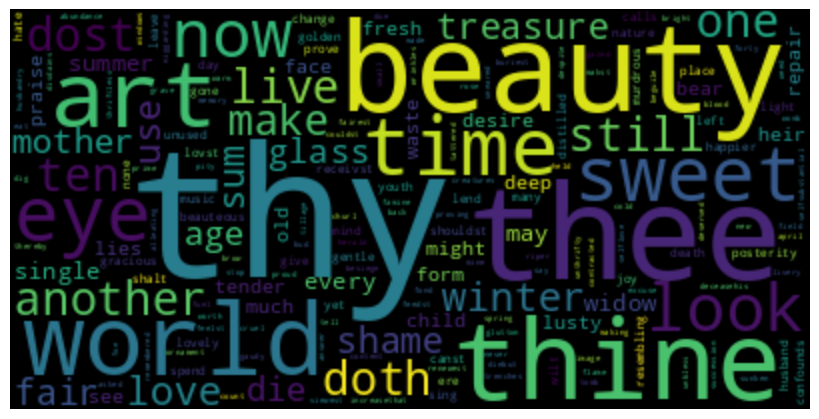

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(' '.join(tokens))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
#turn off axis display
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("wordcloud.png", format='png', dpi=300)

plt.show()
